In [1]:
%%javascript

window.load_remote_theme = false
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/DS_assets/master/';

window.load_local_theme = function(){
    var hostname = document.location.hostname
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme)
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

# The Linear Regression

> Statistics show that of those who contract the habit of eating, very few survive.

<footer>~ George Bernard Shaw</footer>

![break](assets/agenda.png)

1. [Introduction To Regression Data Problems](#Intro-to-Regression-Data-Problems)
1. [How Regressions Work](#How-Regressions-Work)
1. [Determining Cost](#Cost-Of-Linear-Regressions)

**Labs:**
1. [Implementing The Linear Model](#Implementing-the-Linear-Regression)


![break](assets/theory.png)

## Intro to Regression Data Problems

|   	|continuous	|categorical   	|
|:-:	|:-:	|:-:	|
|**supervised**   	|**regression**   	|classification   	|
|**unsupervised**   	|dimension reduction   	|clustering   	|

A regression model is a functional relationship between input & response variables.

The **simple linear regression** model captures a linear relationship between a single input variable x and a response variable y:

$$y = α+βx+ε$$

* $y$ = response variable (the one we want to predict)
* $x$ = input variable (the one we use to train the model)
* $α$ = intercept (where the line crosses the y-axis)
* $β$ = regression coefficient (the model “parameter”)
* $ε$ = residual (the prediction error)

We can extend this model to several input variables, giving us the multiple linear regression model:

$$y = α + β_1x_1 + ... + β_nx_n + ε$$

![resource](assets/regression_analysis_by_example.png) [Regression Analysis By Example](http://type.hk:2551/calibre/browse/book/294)

Linear regression involves several technical assumptions and is often presented with lots of mathematical formality.

In order for us to gain a deeper understanding of the “magic” behind a regression (and to see why we want a machine to do this!), let’s review the math behind this algorithm!

![break](assets/theory.png)

## How Regression Works

Linear regression is, for the most part, just matrix algebra (the stuff we did already!)

Let’s go over the math by hand so we can understand how we determine the regression coefficient.

A linear regression in its simplest form:

$$y = α + βx + ε$$

but we can assume that our α is either 0 or 1, and ε is zero!

$$y = βx$$

but we want to solve for β, which means our new equation looks more like this:

$$β = ( X^TX)^{-1} X^Ty$$

How did we get there?

$$β = \frac{y}x$$

That's problematic, as we cannot divide by a matrix! So we first square the matrix.

$$\frac{xy}{x^2}$$

That's how we avoid division by a matrix

$$\frac{1}{x{^2}} * \frac{xy}1$$

By using inversion; since raising $x$ to the power of negative 1 is equal to $1$ over $x$

$$(XX)^{-1}XY$$

And finally to make it programmer friendly

$$β = ( X^TX)^{-1} X^TY$$

So if we had data:

    Input  Output
    3.385  44.5
    0.48   15.5
    1.35   8.1
    465    423
    36.33  119.5

These would be the steps we moved through

$$β=\left(
    \begin{array}{r}
         \begin{matrix}
             1 & 1 & 1 & 1 & 1 & \\
             3.385 & 0.48 & 1.35 & 465 & 36.33
         \end{matrix}
         \begin{matrix}
            3.385 & 1 & \\
            0.48 & 1 & \\
            1.35 & 1 & \\
            465 & 1 & \\
            36.33 & 1
         \end{matrix}
    \end{array}
  \right)^{-1}
  \cdots$$

$$β = ( X^TX)^{-1} \cdots$$

$$\cdots
    \left(
    \begin{array}{r}
         \begin{matrix}
             1 & 1 & 1 & 1 & 1 & \\
             3.385 & 0.48 & 1.35 & 465 & 36.33
         \end{matrix}
         \begin{matrix}
            44.5 & \\
            15.5 & \\
            8.1 & \\
            423 & \\
            119.5
         \end{matrix}
    \end{array}
  \right)
  $$

$$ \cdots X^TY$$

$$β=\begin{array}{r}
         \begin{bmatrix}
            0.2617 & -0.0006 & \\
            -0.0006 & 0.000006
         \end{bmatrix}
         \begin{bmatrix}
            610.6 & \\
            201205.4425
         \end{bmatrix}
    \end{array}
$$

$$β = ( X^TX)^{-1} X^TY$$

$$ \begin{bmatrix}
            37.2 & \\
            0.838
         \end{bmatrix}
    = \begin{array}{r}
         \begin{bmatrix}
            0.2617 & -0.0006 & \\
            -0.0006 & 0.000006
         \end{bmatrix}
         \begin{bmatrix}
            610.6 & \\
            201205.4425
         \end{bmatrix}
    \end{array}
$$

$$β = ( X^TX)^{-1} X^TY$$

$$ \begin{array}{c}
            Intercept : 37.2 & \\
            β : 0.838
         \end{array}
$$

**Q: How did we do compared to a computer?**

In [10]:
X = [[1,3.385], [1,0.48], [1,1.35], [1,465], [1,36.33]]
y = [44.5, 15.5, 8.1, 423.0, 119.5]

In [13]:
from numpy import linalg
w = linalg.lstsq(X,y)[0]
print w

[ 37.20089608   0.83821876]


A: Not bad!

**Q: Cool! That means we can do all of our regressions by
hand now, right?**

![](assets/angry_cat.jpeg)

If you are interested in the mathematical derivations of the formulas we use in class, I'd suggest picking up

![resource](assets/matrix_algebra.jpg)[Matrix Algebra as a Tool](http://book.type.hk/calibre/browse/book/464)

### Steps in Regression Analysis

1. Statement of the Problem 
1. Selection of Potentially Relevant Variables
1. Data Collection 
1. Model Specification 
1. Method of Fitting 
1. Model Fitting 
1. Model Criticism and Selection

![break](assets/theory.png)

## Cost Of Linear Regressions

** Q: How do measure error in a linear regression model?**

A: In theory, minimize the sum of the squared residuals
(**RSS**, or **SSE**).


$$SST = \Sigma(y_i-\bar{y})^2$$
$$SSR = \Sigma(\hat{y_i}-\bar{y})^2$$
$$SSE = \Sigma(y_i-\hat{y_i})^2$$

SST = Total Sum of Squared Deviations in $Y$ from its mean $\bar{y}$

SSR = Sum of squares due to regression

SSE = Sum of Squared Residiuals

In some cases the total sum of squares equals the sum of the two other sums of squares defined above

$$SST = SSR + SSE$$

In practice, any respectable software can do this for you.

In python, we can find this with some quick code.

In [43]:
import numpy as np

prediction = np.array([1, 2, 3])
actual = np.array([1.12, 1.89, 3.02])

np.sum((prediction - actual) ** 2)

0.026900000000000049

**Q: How do measure goodness of fit?**

A: In theory, we want to maximize $R^2$ (as close to $1$ as possible).

$$R = 1 - \frac{SSE}{SST}$$

Scikit Learn already calculates this for us, as do any other stats packages and programs.

If you want to get serious into regression, learn more about the coefficient of determination.

### Review : Cost

1. What values are we looking for when we consider SSE?
What is the best value we could potentially have?
2. What is the best value we could have for $R^2$ ?
3. What’s the primary difference between these two values?

![break](assets/code.png)

## Implementing the Linear Regression

* Work through various data and scatterplots
* Create linear models with simple relationships (one feature)
* Create linear models with multiple features
* Evaluate model performance

### Install Seaborn for statistical data visualization

In [27]:
!pip install seaborn

Downloading/unpacking seaborn
  Running setup.py (path:/tmp/pip_build_root/seaborn/setup.py) egg_info for package seaborn
    
  Running setup.py install for seaborn
    
Cleaning up...


In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set some Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Default Plotting Size
mpl.rc("figure", figsize=(20, 8))

# Store data in a consistent place
DATA_DIR = '../data/'

### Build an incredibly basic linear model function.

In [3]:
from numpy import array, dot
from scipy.linalg import inv

X = array([ [1, 1], [1, 2], [1, 3], [1, 4] ])
y = array([ [1], [2], [3], [4] ])

print X
print X.T

print dot(X.T, X)

n = inv(dot(X.T, X))

print n

k = dot(X.T, y)

print k

coef_ = dot(n, k)

print coef_

[[1 1]
 [1 2]
 [1 3]
 [1 4]]
[[1 1 1 1]
 [1 2 3 4]]
[[ 4 10]
 [10 30]]
[[ 1.5 -0.5]
 [-0.5  0.2]]
[[10]
 [30]]
[[ -3.55271368e-15]
 [  1.00000000e+00]]


This can all be turned into one relatively simple algorithm, though it is rather limiting in features.

In [15]:
def regression(input, response):
    return dot(inv(dot(input.T, input)), dot(input.T, response))

### Practice: Plotting Data

We're gonna start by playing with data about mammals brain and body size. 

Use the gist [link](https://gist.github.com/tijptjik/2f6307ee4d192ce8927b
) and find the "< >" button to get the actual raw data file.

Lets load the data into pandas and generate a scatterplot:

In [45]:
!curl https://gist.githubusercontent.com/tijptjik/2f6307ee4d192ce8927b/raw/c56f694bf4e7bbeeec92e24d33a8f49f7da37be8/mammals.csv > {DATA_DIR}mammals.csv   

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1402  100  1402    0     0    246      0  0:00:05  0:00:05 --:--:--   335


In [46]:
ls ../data/

airquality.csv         beer.tsv*     __init__.py*
authorship.csv         bs/           insults/
baseball/              cars/         mammals.csv*
baseball.csv*          cars1920.csv  nytimes.csv*
baseball_merged_2011*  cars93.csv    tips.csv*
baseball_merged_2012*  estimation/   zipcodes.csv*


In [47]:
mammals = pd.read_csv(DATA_DIR + 'mammals.csv')
mammals.describe()

,body,brain
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [18]:
mammals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
Name     62 non-null object
body     62 non-null float64
brain    62 non-null float64
dtypes: float64(2), object(1)

In [19]:
mammals.head()

,Name,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


### Built-in Way

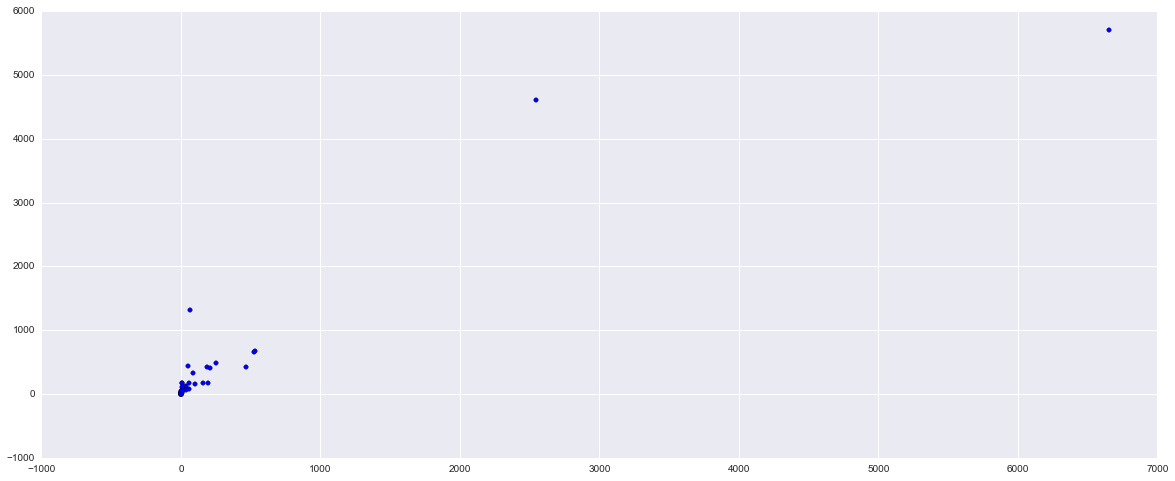

In [20]:
plt.scatter(mammals['body'], mammals['brain'])
plt.show()

### SeaBorn Plot

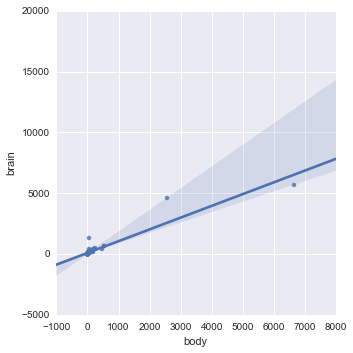

In [50]:
sns.lmplot("body", "brain", mammals);

### Built-in Way

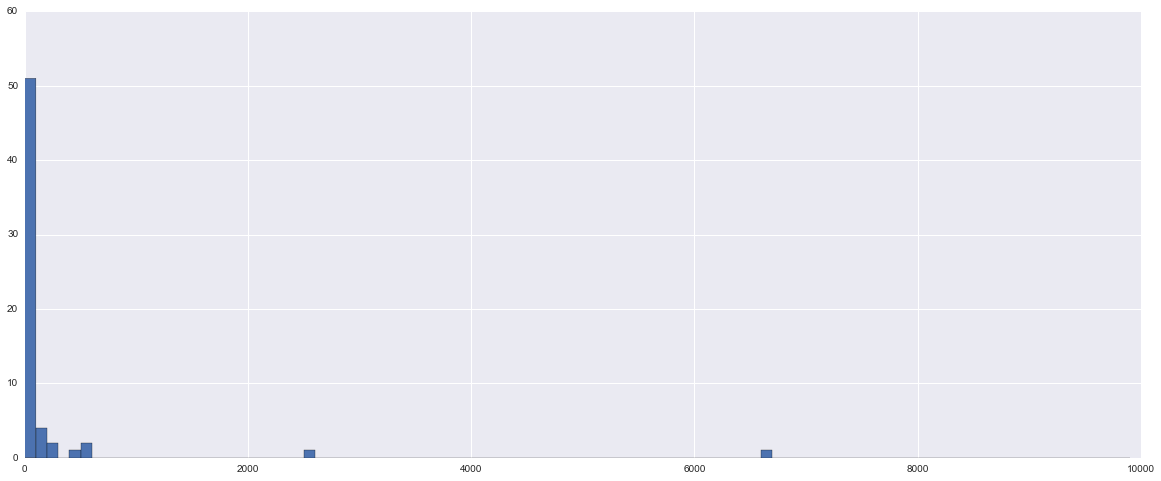

In [22]:
plt.hist(mammals['body'], bins=range(0, 10000, 100))
plt.show()

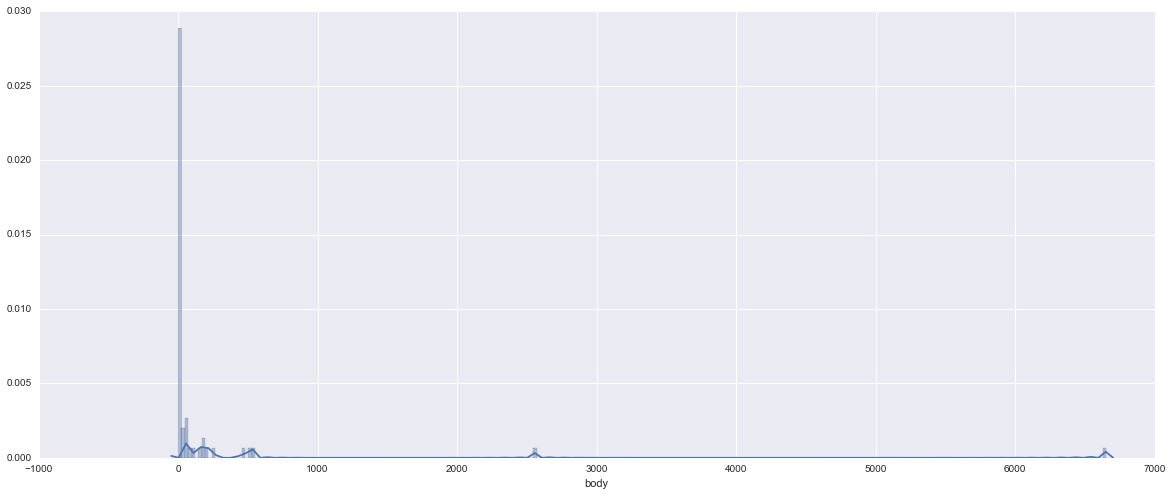

In [23]:
sns.distplot(mammals['body']);

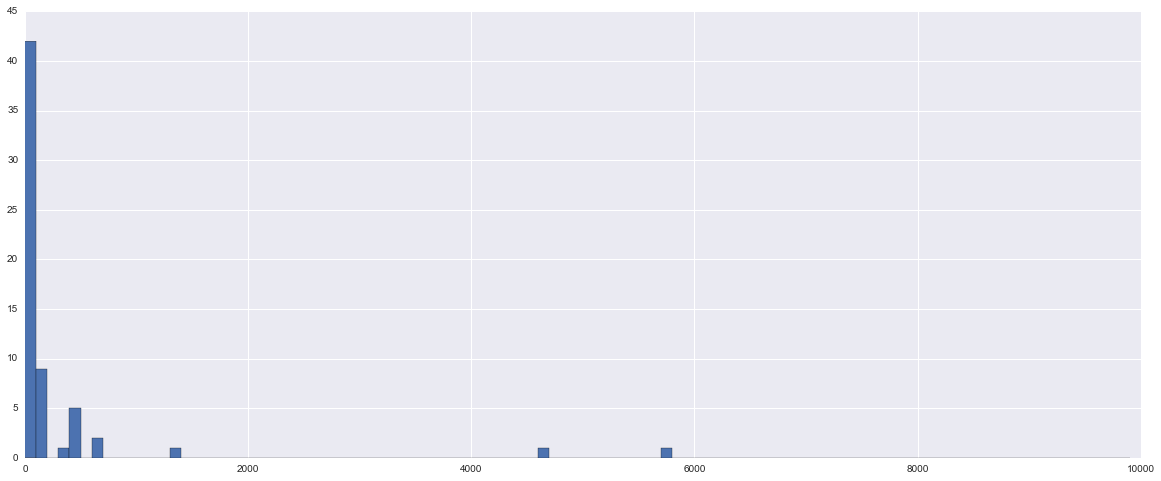

In [24]:
plt.hist(mammals['brain'], bins=range(0, 10000, 100))
plt.show()

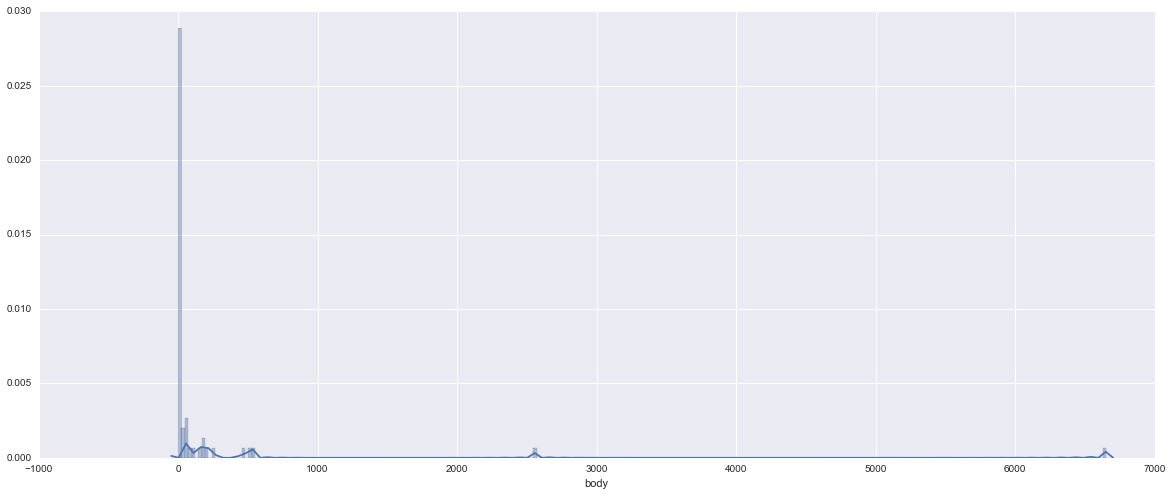

In [25]:
sns.distplot(mammals['body']);

For the most part, we know that this data is a _long tail_ distribution, so we could take the log of each feature to create something that is not just more readable, but new features that could be a better representation of the data!


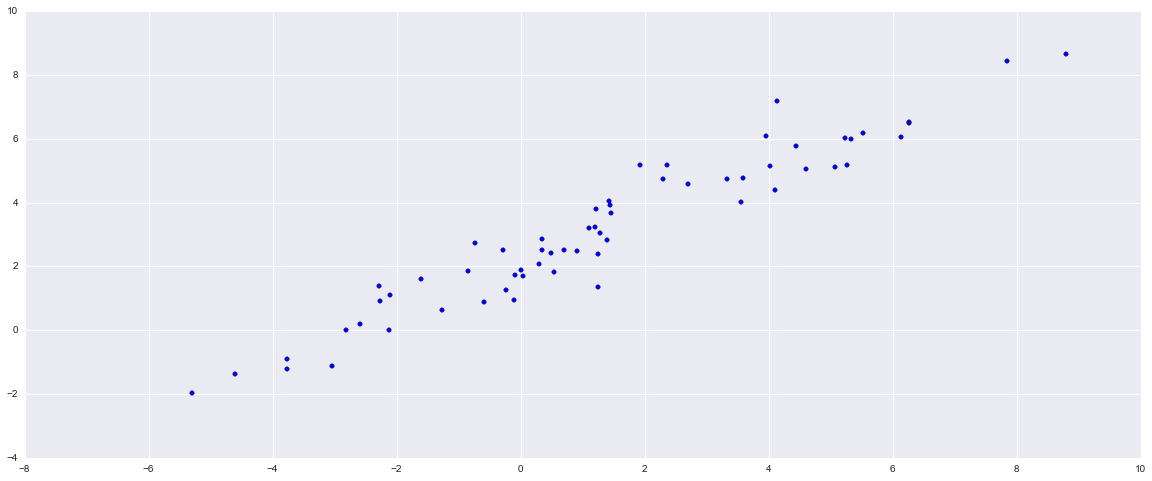

In [26]:
from numpy import log

mammals['log_body'] = log(mammals['body'])
mammals['log_brain'] = log(mammals['brain'])

plt.scatter(mammals['log_body'], mammals['log_brain'])

### Practice: Using Linear Regressions

In [28]:
from sklearn import linear_model

# Make the model object
regr = linear_model.LinearRegression()

# Fit the data
body = [[x] for x in mammals['body'].values]
brain = mammals['brain'].values

regr.fit(body, brain)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

Above we go through some steps to get our data 'presentable' for scikit learn. There is a regression model available in PANDAS, but let's stick with the models available in scikit learn.

In [53]:
# Display the coefficients:
print regr.coef_

# Display our SSE:
print np.sum((regr.predict(body) - brain) ** 2)

# Scoring our model (closer to 1 is better!)
print regr.score(body, brain)

[ 0.96649637]
6722239.0555
0.872662084304


Our performance here is okay - we explained ~87% of the variance in the dataset, and can verify this with a plot:

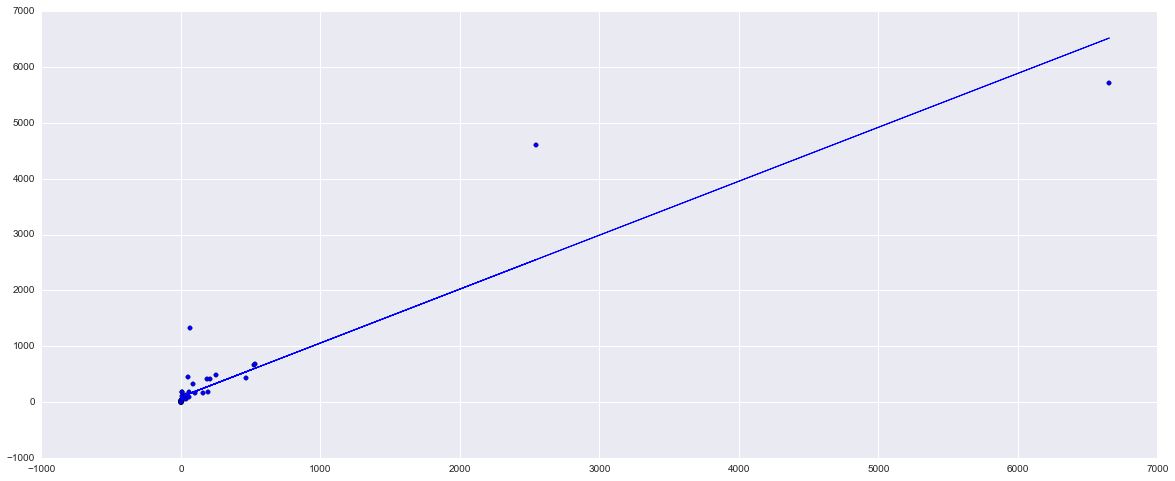

In [31]:
plt.scatter(body, brain)
plt.plot(body, regr.predict(body), color='blue', linewidth=1)
plt.show()

## Alternatively: StatsModels

In [32]:
!pip install statsmodels

Cleaning up...


In [39]:
from statsmodels.formula.api import ols

In [54]:
results = ols('brain ~ body', mammals).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Wed, 18 Mar 2015   Prob (F-statistic):           1.54e-28
Time:                        21:45:11   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     91.0044     43.553      2.090      0.041         3.886   178.123
body           0.9665      0.048     20.278      0.0

![break](assets/voronoi.png)

### Classwork

[Download](http://bit.ly/16bZqir) the cleaned up aggregation nytimes data


1. Go through the same steps, but this time generate a new model use the log of brain and body, which we know generated a much better distribution and cleaner set of data. Compare the results to the original model. Remember that exp() can be
used to "normalize" our "logged" values. ***Note: Make sure you start a new linear regression object!***

2. Using your aggregate data compiled from nytimes1-30.csv, write a python script that determines the best model predicting CTR based off of age and gender. Since gender is not actually numeric (it is binary), investigate ways to vectorize this feature. ***Clue: you may want two features now instead of one.***

3. Compare this practice to making two separate models based on Gender, with Age as your one feature predicting CTR. How are your results different? Which results would you be more confident in presenting to your manager? Why's that?

4. Evaluate what data you could still use to improve your nytimes model. Consider plotting your model to service your explanations and write a short blurb about insights gained and next steps in your "data collection."

![break](assets/resources.png)

## Resources

#### Handbooks

* [Regression Analysis by Example](http://type.hk:2551/calibre/browse/book/294) (**Chapter 1 - 2**) - Samprit Chatterjee
* [Matrix Algebra as a Tool](http://book.type.hk/calibre/browse/book/464) - Ali S. Hadi